In [1]:
# Imports
%pylab inline
import sys
sys.path.append('../../src/')
from helpers import *
from plothelpers import *
from scipy.stats import linregress
from BayesianNamingGame import *
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In this experiment we test convergence in the Bayesian Naming Game. We simulate several runs for the game with $10^7$ timesteps and track the divergens between the agents' distributions and $\alpha$.
We clearly see that $\mathsf{JSD}(\phi_1, \dots, \phi_N) \to 0$ as $t\to \infty$ and we conlude that the agents do indeed settle on a shared language.

In [2]:
folder = '../../results/BNG02'
name = 'BNG02'

In [18]:
# Load data
runs = 10

# Load params
fn = folder + '/BNG02-run-{:0>4}'
params = load_BNG_simulation(fn.format(1), params_only=True)

# Initialize stats
stats = np.zeros((runs, len(params['datapoints']), 4))

# Load stats from every round
for r, run in enumerate(arange(1, runs+1)):
    fn = folder + '/BNG02-run-{:0>4}'.format(run)
    bn = os.path.basename(fn)
    df = pd.read_csv(os.path.join(fn, bn + '-stats.csv.gz'), index_col=0)
    stats[r,:,:] = df.as_matrix()

# Load stats into separate variables
jsd_phis = stats[:,:,0]# / log2(params['K'])
jsd_alpha_mphi = stats[:,:,1]
entropy_mphi = stats[:,:,2]
jsd_alpha_phis = stats[:,:,3]

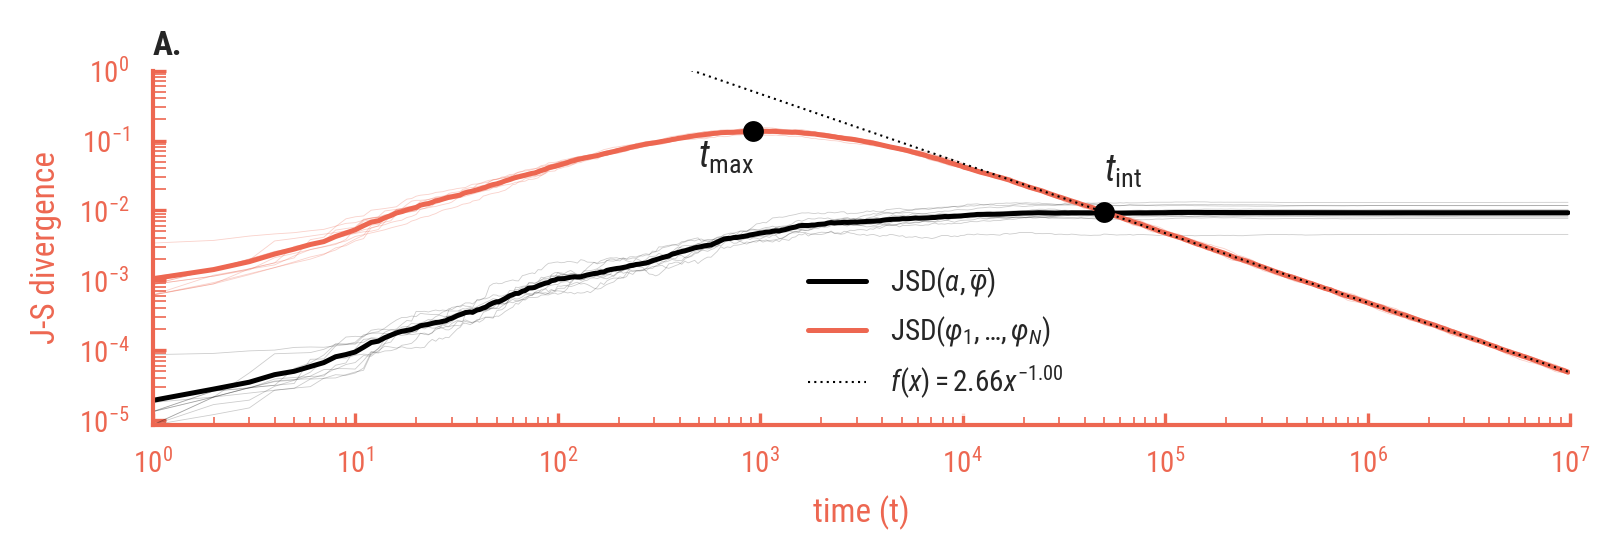

In [19]:
# Plot
figure(figsize=cm2inch(12,3))

# Settings
runs = 20
xs = params['datapoints']

mphis = jsd_phis.mean(axis=0)

# JSD(alpha, mean(phi))
if True:
    l, = pyplot.loglog(xs, jsd_alpha_mphi.mean(axis=0), lw=1.2,
              label=r'$\mathsf{JSD}(\alpha, \overline{\varphi})$')
    pyplot.loglog(xs, jsd_alpha_mphi[:runs,:].T, color=l.get_color(),
                  lw=0.2, alpha=.2);

# JSD(phi_1, ... phi_N)
if True:
    l, = pyplot.loglog(xs, mphis, lw=1.2,
              label=r'$\mathsf{JSD}(\varphi_1, \dots, \varphi_N)$')
    pyplot.loglog(xs, jsd_phis[:runs,:].T, color=l.get_color(),
                  lw=0.2, alpha=.3);

# Linear regression line
if True:
    start = 200
    res = linregress(log10(xs[start:]), log10(jsd_phis.mean(axis=0))[start:])
    pyplot.loglog(xs, xs**res.slope * 10**res.intercept, 'k', dashes=(1,2), lw=.5,
                  label=r'$f(x) = {a:.2f}x^{{{k:.2f}}}$'.format(a=res.intercept, k=res.slope))

# Intersection
if True:
    idx = np.argwhere(np.diff(np.sign(mphis - jsd_alpha_mphi.mean(axis=0))) != 0).reshape(-1) + 0
    x,y = xs[idx[0]], mphis[idx[0]]
    plot(x, y, 'ko', ms=5)
    gca().annotate(r'$t_{\mathrm{int}}$', xy=(x,y),  xycoords='data',
                xytext=(x+10,y+0.01), textcoords='data',
                horizontalalignment='left', verticalalignment='bottom', fontsize=9)

# Maximum
if True:
    x, y = xs[mphis.argmax()], mphis[mphis.argmax()]
    plot(x, y, 'ko', ms=5)
    gca().annotate(r'$t_{\mathrm{max}}$', xy=(x,y),  xycoords='data',
                xytext=(x+5,y-.03), textcoords='data',
                horizontalalignment='right', verticalalignment='top',
                fontsize=9)

# Format
if True:
    legend(bbox_to_anchor=(.45,.5))
    xlabel('time (t)')
    ylabel('J-S divergence')
#     title('Convergence of distributions in the Bayesian Naming Game')
    restyle_title(gca())
    sns.despine()
    ylim(int(10e-7), 1)
    xlim(0,10000000)

subplots_adjust(left=0, bottom=0, right=1, top=1)
savefig('BNG02-results.pdf', bbox_inches='tight')
copyfig('BNG02-results.pdf')